In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [66]:
df = pd.read_csv(r"B:\OneDrive\Pictures\Screenshots\Fiewin screenshots\xlsx\1-8.csv", dtype = {'20240105264': int, '52389': int})
li = []
b_val = []
rang = []
b = 0
for i in df.iloc[:, 0]:
    b += 1
    rang.append(b)
for i in df.iloc[:, 1]:
    last_digit = i % 10
    li.append(last_digit)

df.iloc[:, 1] = li
df["range"] = rang
df.head()
X = df["range"].values
y = df.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
df.head(-5)

,20240105264,52389,range
0,20240105263,3,1
1,20240105262,2,2
2,20240105261,9,3
3,20240105260,7,4
4,20240105259,8,5
...,...,...,...
849,20240107515,1,850
850,20240107514,4,851
851,20240107537,0,852
852,20240107536,9,853


In [67]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train.reshape(-1, 1))
X_test = sc.transform(X_test.reshape(-1, 1))

In [68]:
knn = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
knn.fit(X_train.reshape(-1, 1), y_train)
y_pred = knn.predict(X_test.reshape(-1, 1))
y_pred

array([2, 6, 9, 0, 0, 0, 3, 0, 4, 9, 2, 0, 1, 6, 0, 0, 8, 7, 1, 0, 3, 4,
       2, 2, 0, 7, 8, 4, 0, 9, 6, 4, 9, 8, 2, 4, 8, 8, 6, 8, 2, 2, 0, 0,
       0, 3, 6, 2, 0, 3, 0, 6, 0, 6, 4, 4, 4, 4, 9, 2, 1, 6, 3, 2, 8, 2,
       1, 3, 9, 0, 9, 0, 2, 6, 7, 2, 0, 3, 0, 1, 9, 2, 9, 2, 0, 0, 0, 9,
       2, 0, 6, 4, 0, 4, 0, 1, 2, 4, 6, 8, 0, 4, 0, 0, 6, 3, 4, 6, 0, 8,
       0, 2, 0, 3, 0, 0, 0, 1, 1, 7, 1, 8, 1, 0, 8, 9, 1, 9, 6, 9, 8, 0,
       0, 8, 9, 8, 8, 1, 4, 8, 4, 2, 2, 0, 0, 9, 9, 1, 2, 3, 2, 0, 2, 3,
       7, 2, 3, 1, 1, 3, 0, 0, 0, 6, 0, 4, 0, 6, 0, 0, 7, 0], dtype=int64)

In [69]:
knn.predict(sc.transform([[2026]]))

array([0], dtype=int64)

In [70]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[4 2 1 1 1 0 0 0 1 2]
 [4 0 1 2 3 0 2 0 0 1]
 [2 2 5 2 1 0 1 0 0 2]
 [6 3 3 4 1 0 2 1 4 0]
 [6 2 2 1 2 0 1 0 2 1]
 [3 2 0 1 1 0 2 2 1 4]
 [8 0 2 0 3 0 2 0 0 2]
 [6 2 6 0 0 0 1 2 3 1]
 [7 2 1 1 2 0 4 1 0 3]
 [3 0 3 1 3 0 1 0 5 0]]
0.11046511627906977


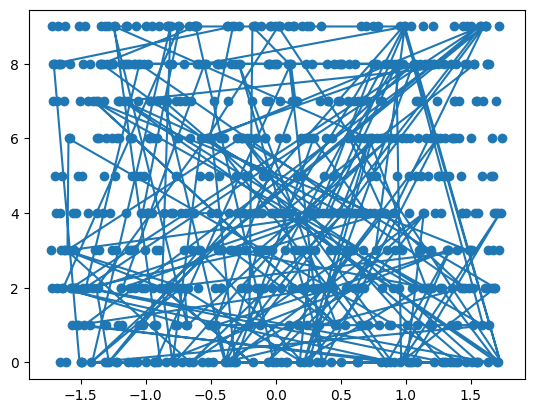

In [71]:
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred)
plt.show()